In [23]:
!pip install scikit-survival
!pip install bnlearn

In [24]:
# If using colab, restart runtime after packages are installed

import bnlearn as bn
import pandas as pd
import numpy as np

In [25]:
# Sometimes it works when ran twice

import sksurv
import sksurv.datasets

In [26]:
'''
Variable 	Name		Description			                Codes / Values
*******************************************************************************************************
1		     id		    Identification Number			    1 - 500
2		    age		    Age at Hospital Admission		    Years
3 	    	gender		Gender 					            0 = Male, 1 = Female
4    		hr		    Initial Heart Rate			        Beats per minute
5		    sysbp		Initial Systolic Blood Pressure 	mmHg
6	    	diasbp		Initial Diastolic Blood Pressure	mmHg
7    		bmi		    Body Mass Index			 	        kg/m^2
8		    cvd		    History of Cardiovascular Disease	0 = No, 1 = Yes						
9		    afb		    Atrial Fibrillation			        0 = No, 1 = Yes						
10  		sho		    Cardiogenic Shock			        0 = No, 1 = Yes						
11  		chf		    Congestive Heart Complications		0 = No, 1 = Yes						
12  		av3		    Complete Heart Block			    0 = No, 1 = Yes				
13  		miord		MI Order 				            0 = First, 1 = Recurrent
14  		mitype		MI Type 				            0 = non Q-wave, 1 = Q-wave
15  		year		Cohort Year				            1 = 1997, 2 = 1999, 3 = 2001				
16  		admitdate	Hospital Admission Date 		    mm/dd/yyyy
17  		disdate		Hospital Discharge Date 		    mm/dd/yyyy
18  		fdate		Date of last Follow Up 			    mm/dd/yyyy
19  		los		    Length of Hospital Stay			    Days from Hospital Admission
								 	                            to Hospital Discharge
20 	    	dstat		Discharge Status from Hospital		0 = Alive, 1 = Dead
21	    	lenfol		Total Length of Follow-up		    Days from Hospital Admission Date
									                            to Date of Last Follow-up 
22	    	event		Vital Status at Last Follow-up		0 = Alive 1 = Dead
'''

'\nVariable \tName\t\tDescription\t\t\t                Codes / Values\n*******************************************************************************************************\n1\t\t     id\t\t    Identification Number\t\t\t    1 - 500\n2\t\t    age\t\t    Age at Hospital Admission\t\t    Years\n3 \t    \tgender\t\tGender \t\t\t\t\t            0 = Male, 1 = Female\n4    \t\thr\t\t    Initial Heart Rate\t\t\t        Beats per minute\n5\t\t    sysbp\t\tInitial Systolic Blood Pressure \tmmHg\n6\t    \tdiasbp\t\tInitial Diastolic Blood Pressure\tmmHg\n7    \t\tbmi\t\t    Body Mass Index\t\t\t \t        kg/m^2\n8\t\t    cvd\t\t    History of Cardiovascular Disease\t0 = No, 1 = Yes\t\t\t\t\t\t\n9\t\t    afb\t\t    Atrial Fibrillation\t\t\t        0 = No, 1 = Yes\t\t\t\t\t\t\n10  \t\tsho\t\t    Cardiogenic Shock\t\t\t        0 = No, 1 = Yes\t\t\t\t\t\t\n11  \t\tchf\t\t    Congestive Heart Complications\t\t0 = No, 1 = Yes\t\t\t\t\t\t\n12  \t\tav3\t\t    Complete Heart Block\t\t\t    0 = No, 1 =

In [27]:
# load data
data, labels = sksurv.datasets.load_whas500()

In [28]:
print(data.columns)

Index(['afb', 'age', 'av3', 'bmi', 'chf', 'cvd', 'diasbp', 'gender', 'hr',
       'los', 'miord', 'mitype', 'sho', 'sysbp'],
      dtype='object')


In [29]:
# total admission date + total follow up days
data['event'] = [label[0] for label in labels]
# data['time'] = [x.days for x in data.time]
data = data.astype(np.int32)
data.head()

,afb,age,av3,bmi,chf,cvd,diasbp,gender,hr,los,miord,mitype,sho,sysbp,event
0,1,83,0,25,0,1,78,0,89,5,1,0,0,152,0
1,0,49,0,24,0,1,60,0,84,5,0,1,0,120,0
2,0,70,0,22,0,0,88,1,83,5,0,1,0,147,0
3,0,70,0,26,1,1,76,0,65,10,0,1,0,123,1
4,0,70,0,24,0,1,85,0,63,6,0,1,0,135,0


In [30]:
import tabulate

In [31]:
DAG = bn.structure_learning.fit(data, methodtype='hc', scoretype='bic')

DAG = bn.independence_test(DAG, data, alpha=0.05, prune=True)
print(DAG['independence_test'])

# print adjacency matrix
print(DAG['adjmat'])

# Interactive plotting
G = bn.plot(DAG, interactive = True)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute edge strength with [chi_square]
   source  target  stat_test       p_value  chi_square  dof
0     chf     afb       True  3.858062e-04   12.599712    1
1     chf  gender       True  5.520166e-04   11.931198    1
2     cvd   miord       True  2.777107e-05   17.564597    1
3   miord  mitype       True  1.050135e-09   37.229493    1
4  mitype   event       True  1.560444e-04   14.297834    1
5   event     chf       True  5.796492e-17   70.045067    1
6   event     sho       True  1.930593e-03    9.614383    1
target    afb    age    av3    bmi    chf    cvd  diasbp  gender     hr  \
source                                                                    
afb     False  False  False  False  False  False   False   False  False   
age     False  False  False  False  False  False   False   False  False   
av3     False  False  False  False  False  False   False   False  False   
bmi     False  F

In [32]:
DAG_2 = bn.structure_learning.fit(data, methodtype='hc', scoretype='k2')

DAG_2 = bn.independence_test(DAG_2, data, alpha=0.05, prune=True)
print(DAG_2['independence_test'])
# print adjacency matrix
print(DAG_2['adjmat'])

# Interactive plotting
G = bn.plot(DAG_2, interactive = True)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Edge [av3 <-> mitype] [P=0.157994] is excluded because it was not significant (P<0.05) with [chi_square]
[bnlearn] >Edge [av3 <-> sho] [P=0.130959] is excluded because it was not significant (P<0.05) with [chi_square]
    source  target  stat_test        p_value    chi_square    dof
0      afb     chf       True   3.858062e-04     12.599712      1
1      av3      hr       True   1.926846e-06    184.620083    104
2      chf   event       True   5.796492e-17     70.045067      1
3      chf      hr       True   4.611001e-03    145.392262    104
4      chf  gender       True   5.520166e-04     11.931198      1
5   diasbp   sysbp       True  1.606816e-155  17378.685170  12672
6   gender  mitype       True   9.391397e-04     10.943867      1
7    miord     cvd       True   2.777107e-05     17.564597      1
8   mitype   miord       True   1.050135e-09     

In [33]:
DAG_2 = bn.structure_learning.fit(data, methodtype='hc', scoretype='k2')

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]


In [34]:
DAG_cs_1 = bn.structure_learning.fit(data, methodtype='cs', scoretype='bic')

# print adjacency matrix
print(DAG_cs_1['adjmat'])

# Interactive plotting
G = bn.plot(DAG_cs_1, interactive = True)

[bnlearn] >Computing best DAG using [cs]


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

target     hr    los  gender  diasbp  sysbp  mitype    age  event    sho  \
source                                                                     
hr      False   True   False   False  False   False  False  False  False   
los     False  False   False   False  False   False  False  False  False   
gender  False   True   False   False  False   False  False  False  False   
diasbp  False  False   False   False   True   False  False  False  False   
sysbp   False  False   False   False  False   False  False  False  False   
mitype  False  False   False   False  False   False   True  False  False   
age     False  False   False   False  False   False  False  False  False   
event   False  False   False   False  False   False  False  False  False   
sho     False  False   False   False  False   False  False   True  False   
cvd     False  False   False   False  False   False  False  False  False   
miord   False  False   False   False  False   False  False  False  False   

target    c

In [35]:
DAG_cs_2 = bn.structure_learning.fit(data, methodtype='cs', scoretype='k2')

# print adjacency matrix
print(DAG_cs_2['adjmat'])

# Interactive plotting
G = bn.plot(DAG_cs_2, interactive = True)

[bnlearn] >Computing best DAG using [cs]


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

target     hr    los  gender  diasbp  sysbp  mitype    age  event    sho  \
source                                                                     
hr      False   True   False   False  False   False  False  False  False   
los     False  False   False   False  False   False  False  False  False   
gender  False   True   False   False  False   False  False  False  False   
diasbp  False  False   False   False   True   False  False  False  False   
sysbp   False  False   False   False  False   False  False  False  False   
mitype  False  False   False   False  False   False   True  False  False   
age     False  False   False   False  False   False  False  False  False   
event   False  False   False   False  False   False  False  False  False   
sho     False  False   False   False  False   False  False   True  False   
cvd     False  False   False   False  False   False  False  False  False   
miord   False  False   False   False  False   False  False  False  False   

target    c

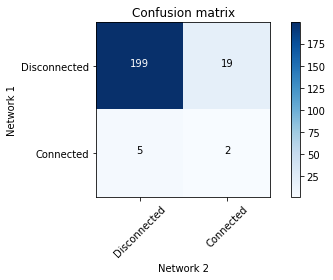

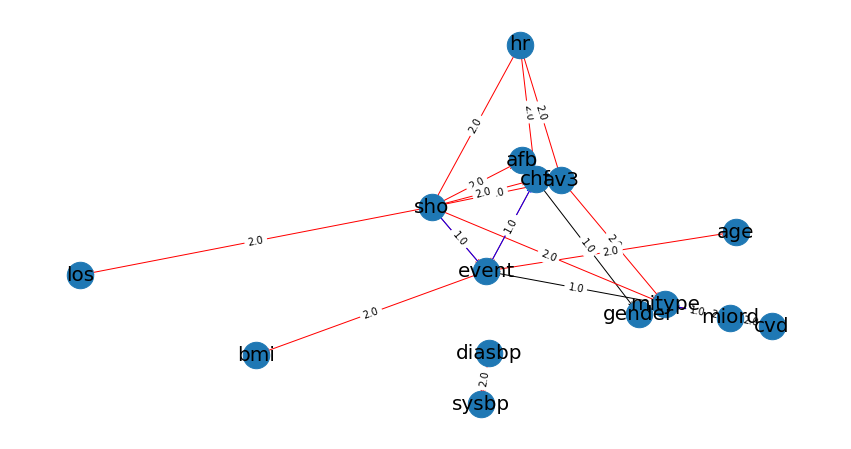

(array([[199,  19],
        [  5,   2]]),
 target  afb  age  av3  bmi  chf  cvd  diasbp  gender  hr  los  miord  mitype  \
 source                                                                         
 afb       0    0    0    0    2    0       0       0   0    0      0       0   
 age       0    0    0    0    0    0       0       0   0    0      0       0   
 av3       0    0    0    0    0    0       0       0   2    0      0       2   
 bmi       0    0    0    0    0    0       0       0   0    0      0       0   
 chf      -1    0    0    0    0    0       0       1   2    0      0       0   
 cvd       0    0    0    0    0    0       0       0   0    0     -1       0   
 diasbp    0    0    0    0    0    0       0       0   0    0      0       0   
 gender    0    0    0    0    0    0       0       0   0    0      0       2   
 hr        0    0    0    0    0    0       0       0   0    0      0       0   
 los       0    0    0    0    0    0       0       0   0    0     

In [36]:
bn.compare_networks(DAG, DAG_2)

In [37]:
# Parameter learning on the user-defined DAG and input data using maximumlikelihood
model_mle = bn.parameter_learning.fit(DAG, data, methodtype='maximumlikelihood')

[bnlearn] >Parameter learning> Computing parameters using [maximumlikelihood]
[bnlearn] >Conversion of adjmat to BayesianNetwork.
[bnlearn] >CPD of chf:
+--------+---------------------+--------------------+
| event  | event(0)            | event(1)           |
+--------+---------------------+--------------------+
| chf(0) | 0.8421052631578947  | 0.4883720930232558 |
+--------+---------------------+--------------------+
| chf(1) | 0.15789473684210525 | 0.5116279069767442 |
+--------+---------------------+--------------------+
[bnlearn] >CPD of afb:
+--------+---------------------+---------------------+
| chf    | chf(0)              | chf(1)              |
+--------+---------------------+---------------------+
| afb(0) | 0.8840579710144928  | 0.7548387096774194  |
+--------+---------------------+---------------------+
| afb(1) | 0.11594202898550725 | 0.24516129032258063 |
+--------+---------------------+---------------------+
[bnlearn] >CPD of gender:
+-----------+---------------------+

In [38]:
# Print the learned CPDs
bn.plot(model_mle, interactive=True)

[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


{'G': <networkx.classes.digraph.DiGraph at 0x7f2db5dada10>,
 'edge_properties': {('chf', 'afb'): {'color': '#000000', 'weight': 1},
  ('chf', 'gender'): {'color': '#000000', 'weight': 1},
  ('cvd', 'miord'): {'color': '#000000', 'weight': 1},
  ('event', 'chf'): {'color': '#000000', 'weight': 1},
  ('event', 'sho'): {'color': '#000000', 'weight': 1},
  ('miord', 'mitype'): {'color': '#000000', 'weight': 1},
  ('mitype', 'event'): {'color': '#000000', 'weight': 1}},
 'node_properties': {'afb': {'node_color': '#1f456e', 'node_size': 10},
  'age': {'node_color': '#1f456e', 'node_size': 10},
  'av3': {'node_color': '#1f456e', 'node_size': 10},
  'bmi': {'node_color': '#1f456e', 'node_size': 10},
  'chf': {'node_color': '#1f456e', 'node_size': 10},
  'cvd': {'node_color': '#1f456e', 'node_size': 10},
  'diasbp': {'node_color': '#1f456e', 'node_size': 10},
  'event': {'node_color': '#1f456e', 'node_size': 10},
  'gender': {'node_color': '#1f456e', 'node_size': 10},
  'hr': {'node_color': '#1

In [39]:
# Parameter learning on the user-defined DAG and input data using Bayes
model_bayes = bn.parameter_learning.fit(DAG, data, methodtype='bayes')


[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianNetwork.
[bnlearn] >CPD of chf:
+--------+---------------------+--------------------+
| event  | event(0)            | event(1)           |
+--------+---------------------+--------------------+
| chf(0) | 0.6242038216560509  | 0.4965034965034965 |
+--------+---------------------+--------------------+
| chf(1) | 0.37579617834394907 | 0.5034965034965035 |
+--------+---------------------+--------------------+
[bnlearn] >CPD of afb:
+--------+--------------------+--------------------+
| chf    | chf(0)             | chf(1)             |
+--------+--------------------+--------------------+
| afb(0) | 0.6568047337278107 | 0.5603053435114503 |
+--------+--------------------+--------------------+
| afb(1) | 0.3431952662721893 | 0.4396946564885496 |
+--------+--------------------+--------------------+
[bnlearn] >CPD of gender:
+-----------+--------------------+--------------------+
| chf

In [40]:
# Print the learned CPDs
bn.plot(model_bayes, interactive=True)

[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


{'G': <networkx.classes.digraph.DiGraph at 0x7f2db5982410>,
 'edge_properties': {('chf', 'afb'): {'color': '#000000', 'weight': 1},
  ('chf', 'gender'): {'color': '#000000', 'weight': 1},
  ('cvd', 'miord'): {'color': '#000000', 'weight': 1},
  ('event', 'chf'): {'color': '#000000', 'weight': 1},
  ('event', 'sho'): {'color': '#000000', 'weight': 1},
  ('miord', 'mitype'): {'color': '#000000', 'weight': 1},
  ('mitype', 'event'): {'color': '#000000', 'weight': 1}},
 'node_properties': {'afb': {'node_color': '#1f456e', 'node_size': 10},
  'age': {'node_color': '#1f456e', 'node_size': 10},
  'av3': {'node_color': '#1f456e', 'node_size': 10},
  'bmi': {'node_color': '#1f456e', 'node_size': 10},
  'chf': {'node_color': '#1f456e', 'node_size': 10},
  'cvd': {'node_color': '#1f456e', 'node_size': 10},
  'diasbp': {'node_color': '#1f456e', 'node_size': 10},
  'event': {'node_color': '#1f456e', 'node_size': 10},
  'gender': {'node_color': '#1f456e', 'node_size': 10},
  'hr': {'node_color': '#1

In [41]:
q1 = bn.inference.fit(model_bayes, variables=['event'], evidence={'sho':0})
print(q1.df)

[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+----+---------+----------+
|    |   event |        p |
+====+=========+==========+
|  0 |       0 | 0.541922 |
+----+---------+----------+
|  1 |       1 | 0.458078 |
+----+---------+----------+
   event         p
0      0  0.541922
1      1  0.458078
